# TF data records and dataset creation  + TF Data API

## Exemplo simples
#### O que é a classe "dataset" do TF
## ver https://www.tensorflow.org/guide/data
### Criação deste tipo de dados com tf.data.Dataset.from_tensor_slices() ou só "from_tensor"

Carregar as bibs

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from time import time
from timeit import timeit
import cv2
import os
import pickle

#para usar GPU
#gp=tf.config.list_physical_devices('GPU')
#print(gp)
#if len(gp)!=0:
#    tf.config.experimental.set_memory_growth(gp[0],True)

In [2]:
import tensorflow_datasets as tfdt


In [9]:
# coding=utf-8
# Copyright 2022 The TensorFlow Datasets Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""BeeDataset dataset."""
import json
import random

import tensorflow as tf
import tensorflow_datasets.public_api as tfds

_DESCRIPTION = """
This dataset contains images and a set of labels that expose certain characterisitics of that images, 
such as *varroa-mite* infections, bees carrying *pollen-packets* or bee that are *cooling the hive* 
by flappingn their wings. Additionally, this dataset contains images of *wasps* to be able to distinguish 
bees and wasps.The images of the bees are taken from above and rotated. The bee is vertical and either 
its head or the trunk is on top. All images were taken with a green background and the distance to the 
bees was always the same, thus all bees have the same size. Each image can have multiple labels assigned 
to it. E.g. a bee can be cooling the hive and have a varrio-mite infection at the same time.
This dataset is designed as mutli-label dataset, where each label, e.g. *varroa_output*, contains 1 
if the characterisitic was present in the image and a 0 if it wasn't. All images are provided by 300 
pixel height and 150 pixel witdh. As default the dataset provides the images as 150x75 (h,w) pixel. 
You can select 300 pixel height by loading the datset with the name "bee_dataset/bee_dataset_300" and 
with 200 pixel height by "bee_dataset/bee_dataset_200".
License: GNU GENERAL PUBLIC LICENSE
Author: Fabian Hickert <Fabian.Hickert@raspbee.de>
"""

_CITATION = """
@misc{BeeAlarmed - A camera based bee-hive monitoring,
  title =   "Dataset for a camera based bee-hive monitoring",
  url={https://github.com/BeeAlarmed}, journal={BeeAlarmed},
  author =  "Fabian Hickert",
  year   =  "2021",
  NOTE   = "\\url{https://raspbee.de/} and \\url{https://github.com/BeeAlarmed/BeeAlarmed}"
}
"""


class BeeDatasetConfig(tfds.core.BuilderConfig):
  """BuilderConfig for the BeeDataset.
    Args:
    image_width (int): Desired image width.
    image_height (int): Desired image heigth.
  """

  def __init__(self, image_height=300, image_width=150, **kwargs):
    super().__init__(**kwargs)
    self.width = image_width
    self.height = image_height
    self.depth = 3


class BeeDataset(tfds.core.GeneratorBasedBuilder):
  """DatasetBuilder for BeeDataset dataset."""

  VERSION = tfds.core.Version('1.0.0')

  URL = 'https://raspbee.de/BeeDataset_20201121.zip'

  BEE_CFG_300 = BeeDatasetConfig(
      name='bee_dataset_300',
      description='BeeDataset images with 300 pixel height and 150 pixel width',
      version='1.0.0',
      image_height=300,
      image_width=150)

  BEE_CFG_200 = BeeDatasetConfig(
      name='bee_dataset_200',
      description='BeeDataset images with 200 pixel height and 100 pixel width',
      version='1.0.0',
      image_height=200,
      image_width=100)

  BEE_CFG_150 = BeeDatasetConfig(
      name='bee_dataset_150',
      description='BeeDataset images with 200 pixel height and 100 pixel width',
      version='1.0.0',
      image_height=150,
      image_width=75)

  BUILDER_CONFIGS = [BEE_CFG_300, BEE_CFG_200, BEE_CFG_150]

  def _info(self) -> tfds.core.DatasetInfo:
    """Returns the dataset metadata."""
    t_shape = (self.builder_config.height, self.builder_config.width,
               self.builder_config.depth)
    features = tfds.features.FeaturesDict({
        'input': tfds.features.Image(shape=t_shape),
        'output': {
            'varroa_output': tf.float64,
            'pollen_output': tf.float64,
            'wasps_output': tf.float64,
            'cooling_output': tf.float64,
        }
    })

    return tfds.core.DatasetInfo(
        builder=self,
        description=_DESCRIPTION,
        features=features,
        supervised_keys=('input', 'output'),
        homepage='https://raspbee.de',
        citation=_CITATION,
    )

  def _split_generators(self, dl_manager):
    """Returns SplitGenerators."""
    path = dl_manager.download_and_extract(self.URL)
    return {
        'train': self._generate_examples(path),
    }

  def _generate_examples(self, path):
    # Load labels and image path.
    data = json.loads((path / 'data.json').read_text())
    indexes = list(data.keys())
    random.shuffle(indexes)
    for name in indexes:
      labels = []
      entry = data[name]

      for lbl in ['varroa', 'pollen', 'wasps', 'cooling']:
        labels.append(1.0 if entry[lbl] else 0.0)

      img = path / f'images_{self.builder_config.height}' / name

      yield name + str(self.builder_config.height), {
          'input': img,
          'output': {
              'varroa_output': labels[0],
              'pollen_output': labels[1],
              'wasps_output': labels[2],
              'cooling_output': labels[3]
          }
      }


In [63]:
str(D.DESCR)

'tfds.core.DatasetInfo(\n    name=\'kmnist\',\n    full_name=\'kmnist/3.0.1\',\n    description="""\n    Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.\n    """,\n    homepage=\'http://codh.rois.ac.jp/kmnist/index.html.en\',\n    data_path=\'/home/gcm/tensorflow_datasets/kmnist/3.0.1\',\n    download_size=20.26 MiB,\n    dataset_size=31.76 MiB,\n    features=FeaturesDict({\n        \'image\': Image(shape=(28, 28, 1), dtype=tf.uint8),\n        \'label\': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),\n    }),\n    supervised_keys=(\'image\', \'label\'),\n    disable_shuffling=False,\n    splits={\n        \'test\': <SplitInfo num_examples=10000, num_shards=1>,\n        \'train\': <SplitInfo num_examples=60000, num_shards=1>,\n    

#### Criar gerador a partir de tensor (range)

In [2]:
a=tf.range(10)
print(a)
print(type(a))

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [3]:
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
# or DT=tf.dataDatase.range(10)
print(DT)
for i in DT:
    print(i)


tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
#tensor com 3 elementos por slice
X=tf.convert_to_tensor(rd.randint(0,10,(3,5),dtype='int32'))
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
print(DT)
for i in DT:
    print(i)


tf.Tensor(
[[0 0 1 6 6]
 [8 6 9 0 0]
 [7 5 1 5 9]], shape=(3, 5), dtype=int32)
<_TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.int32, name=None)>
tf.Tensor([0 0 1 6 6], shape=(5,), dtype=int32)
tf.Tensor([8 6 9 0 0], shape=(5,), dtype=int32)
tf.Tensor([7 5 1 5 9], shape=(5,), dtype=int32)


#### Usar comando $\texttt{take}$ para ver só uns quantos itens

In [5]:
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
print(DT)
for i in DT.take(3):
    print(i)


tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [8]:
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
for i in range(4):
    for j in DT.take(3):
        print(j)


tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


#### Dataset as a Python iterator - using the $\texttt{next()}$ function

In [9]:
#python iterators
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
print(DT)
it=iter(DT)
print(it)
print(next(it))
print(next(it))

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [9]:
X=tf.range(10)
print(X)
DT=tf.data.Dataset.from_tensor_slices(X)
print(DT)
it=iter(DT)
# Error when N>10
N=10
for i in range(N):
    print(next(it))

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<TensorSliceDataset shapes: (), types: tf.int32>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


### Other dataset creation functions

In [58]:
#processing lines from files
f1=open('file1.txt')
print(str(f1.read()))
f1.close()
f2=open('file2.txt')
print(str(f2.read()))
f2.close()

DT= tf.data.TextLineDataset(["file1.txt", "file2.txt"])
#DT= tf.data.TextLineDataset(["CaliforniaHousing.csv"])
for l in DT:
    print(l.numpy().decode())


Because I could not stop for Death,
He kindly stopped for me;
The carriage held but just ourselves
And Immortality.

I'm nobody! Who are you?
Are you nobody, too?
Then there's a pair of us - don't tell!
They'd banish us, you know.
How dreary to be somebody!
How public, like a frog
To tell your name the livelong day
To an admiring bog!

Because I could not stop for Death,
He kindly stopped for me;
The carriage held but just ourselves
And Immortality.
I'm nobody! Who are you?
Are you nobody, too?
Then there's a pair of us - don't tell!
They'd banish us, you know.
How dreary to be somebody!
How public, like a frog
To tell your name the livelong day
To an admiring bog!


### Chaining Transformations

### O código anterior pode ser feito encadeando comandos 
### A ordem dos encadeamentos influencia os resultados

In [35]:
DT=tf.data.Dataset.range(10).repeat(2).batch(6)
print('**********1st****************')
[print(i) for i in DT]
    
    
print('**********2nd****************')
DT=tf.data.Dataset.range(10).batch(6).repeat(2)
[print(i) for i in DT]


**********1st****************
tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int64)
tf.Tensor([6 7 8 9 0 1], shape=(6,), dtype=int64)
tf.Tensor([2 3 4 5 6 7], shape=(6,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)
**********2nd****************
tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int64)
tf.Tensor([6 7 8 9], shape=(4,), dtype=int64)
tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int64)
tf.Tensor([6 7 8 9], shape=(4,), dtype=int64)


[None, None, None, None]

### Use shuffle before batch

In [14]:
DT=tf.data.Dataset.range(5).repeat(3).batch(6).shuffle(buffer_size=5)
print('**********1st****************')
[print(i) for i in DT]
    
    
DT=tf.data.Dataset.range(5).repeat(3).shuffle(buffer_size=5).batch(6)
print('**********2nd****************')
[print(i) for i in DT]

DT=tf.data.Dataset.range(5).shuffle(buffer_size=5).repeat(3).batch(6)
print('**********3rd****************')
[print(i) for i in DT]


**********1st****************
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([1 2 3 4 0 1], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 0], shape=(6,), dtype=int64)
**********2nd****************
tf.Tensor([3 0 0 2 1 4], shape=(6,), dtype=int64)
tf.Tensor([2 4 2 3 3 4], shape=(6,), dtype=int64)
tf.Tensor([1 1 0], shape=(3,), dtype=int64)
**********3rd****************
tf.Tensor([2 1 0 3 4 3], shape=(6,), dtype=int64)
tf.Tensor([1 2 4 0 4 1], shape=(6,), dtype=int64)
tf.Tensor([2 3 0], shape=(3,), dtype=int64)


[None, None, None]

In [18]:
batchS=12
DT=tf.data.Dataset.range(10).repeat(3).batch(batchS).shuffle(buffer_size=10)
for i in DT:
    print(i)

tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)


In [19]:
#baralhar (necessário recomeçar)
DT=tf.data.Dataset.range(10).repeat(3).shuffle(buffer_size=10,seed=42).batch(batchS)
#DT=DT.shuffle(buffer_size=10,seed=42).batch(batchS)
for i in DT:
    print(i)


tf.Tensor([5 2 8 1 7 9 2 0 0 4 6 3], shape=(12,), dtype=int64)
tf.Tensor([1 0 9 3 7 6 7 8 3 4 6 8], shape=(12,), dtype=int64)
tf.Tensor([4 1 5 9 5 2], shape=(6,), dtype=int64)


#### Com .repeat() o gerador não para

In [20]:
DT=tf.data.Dataset.range(10).shuffle(buffer_size=10,seed=42).batch(batchS).repeat()

for i,x in enumerate(DT):
    print(x)
    if i>10:
        break

tf.Tensor([5 9 6 4 7 1 2 8 3 0], shape=(10,), dtype=int64)
tf.Tensor([3 7 6 5 8 4 0 1 9 2], shape=(10,), dtype=int64)
tf.Tensor([2 8 9 6 0 4 1 3 5 7], shape=(10,), dtype=int64)
tf.Tensor([6 9 0 5 3 2 4 1 8 7], shape=(10,), dtype=int64)
tf.Tensor([9 5 1 8 7 4 3 0 2 6], shape=(10,), dtype=int64)
tf.Tensor([4 7 8 1 9 0 6 5 3 2], shape=(10,), dtype=int64)
tf.Tensor([2 1 6 8 3 0 7 4 5 9], shape=(10,), dtype=int64)
tf.Tensor([2 7 9 1 8 5 6 3 0 4], shape=(10,), dtype=int64)
tf.Tensor([7 9 0 6 2 3 5 1 8 4], shape=(10,), dtype=int64)
tf.Tensor([0 9 2 5 6 3 7 8 1 4], shape=(10,), dtype=int64)
tf.Tensor([1 4 0 6 9 5 3 8 2 7], shape=(10,), dtype=int64)
tf.Tensor([1 4 2 6 7 8 3 5 9 0], shape=(10,), dtype=int64)


#### Aceder aos elementos de DT:
#### Notar que DT são só 3 tensores - take(n) com n>3 não altera resultado
#### Mas pode-se chamar várias vezes e dá tensores diferentes

In [203]:
for n in range(3):
    for r in DT.take(5):
        print(r)
    print('-')

tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-
tf.Tensor([2 3 4 5 6 7 8 9 0 1 2 3], shape=(12,), dtype=int64)
tf.Tensor([4 5 6 7 8 9], shape=(6,), dtype=int64)
tf.Tensor([0 1 2 3 4 5 6 7 8 9 0 1], shape=(12,), dtype=int64)
-


#### Criar e ler um simples dataset

### Criar um gerador 

In [119]:
#criar gerador de três elementos
def arrayInt():
    return rd.randint(-2**15,2**15,size=4,dtype='int16')

def matrixUint():
    return rd.randint(0,255,size=(3,3),dtype='uint8')

def arrayFloat():
    return rd. randn(5).astype(np.float32)

def generator():
    #deitar continuamente
    while(True):
        a=arrayInt()
        M=matrixUint()
        f=arrayFloat()
        
        yield a,M,f

In [161]:
c=0
for a,M,f in generator():
    c+=1
    print(a)
    print(M)
    print(f)
    if c>5:
        break

print(c)                      

[-9664  1814 16082 -5422]
[[174 121 225]
 [183 189   9]
 [ 69 175  16]]
[-1.0999719   0.11372941  1.5592335  -0.40443957 -0.93626505]
[31978 -6440 20259 15913]
[[177 191 165]
 [107  60 182]
 [ 97  80  73]]
[-1.219581    0.6939774  -0.5321984  -0.55153555 -0.7087945 ]
[ 14957  31681  27183 -30740]
[[208 156 161]
 [ 16 160  13]
 [103  32 102]]
[0.75400746 0.4059997  0.21547839 0.3382673  0.35364875]
[21245 -3219 -3164 25968]
[[204 154  27]
 [110  56 212]
 [ 17  47   2]]
[-0.77188593 -0.5023383  -0.02088019  0.3830908   1.7038862 ]
[ 13650  -9724   8775 -15946]
[[124 216 235]
 [161 142  62]
 [129  32 179]]
[ 0.46829972  1.9050341  -0.7707365  -0.31116116 -0.04753039]
[-19367  30382  25698  28629]
[[150  40  19]
 [ 12 168 254]
 [243 135  69]]
[-0.5030424   0.3905247  -0.32169467  0.3690189   0.42744833]
6


#### TF Generator

In [120]:
DT=tf.data.Dataset.from_generator(generator,(tf.int16,tf.uint8,tf.float32),((4,),(3,3),(5,)))
DT2=DT.batch(1)
for a,M,f in DT2.take(4):
    print(a)
    print(M)
    print(f)

tf.Tensor([[ 22400  14596  -5681 -26311]], shape=(1, 4), dtype=int16)
tf.Tensor(
[[[ 99  11 192]
  [170  45 229]
  [254  45 166]]], shape=(1, 3, 3), dtype=uint8)
tf.Tensor([[ 0.6934227   1.8119166   1.7088819  -0.08047175  1.7492176 ]], shape=(1, 5), dtype=float32)
tf.Tensor([[-5222 18417  2662 -2336]], shape=(1, 4), dtype=int16)
tf.Tensor(
[[[ 87 115 219]
  [ 92  62 240]
  [123 112 228]]], shape=(1, 3, 3), dtype=uint8)
tf.Tensor([[-1.138452   -1.5569526   0.15498243  0.15015925 -0.83102524]], shape=(1, 5), dtype=float32)
tf.Tensor([[  9952  10843 -12360  -7999]], shape=(1, 4), dtype=int16)
tf.Tensor(
[[[237 206  88]
  [237 126  40]
  [  2  34  71]]], shape=(1, 3, 3), dtype=uint8)
tf.Tensor([[-1.002747   -0.04730956 -0.8164565   1.3149531  -0.6965919 ]], shape=(1, 5), dtype=float32)
tf.Tensor([[-20159  26923 -21304  25511]], shape=(1, 4), dtype=int16)
tf.Tensor(
[[[ 12 148 237]
  [108 117 239]
  [113  73  11]]], shape=(1, 3, 3), dtype=uint8)
tf.Tensor([[-0.00296506 -0.26910135 -0.30177

## Data transformations
### map(), filter() and apply() functions

In [10]:
#DT= tf.data.Dataset.range(10).shuffle(10,reshuffle_each_iteration=False,seed=42).repeat(3).batch(5)
DT= tf.data.Dataset.range(10).repeat(3).batch(5)
for l in DT:
    print(l.numpy())
DT=DT.map(lambda x :x*(x%2))
print('\n')
for l in DT:
    print(l.numpy())

[0 1 2 3 4]
[5 6 7 8 9]
[0 1 2 3 4]
[5 6 7 8 9]
[0 1 2 3 4]
[5 6 7 8 9]


[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]


### Decorators (tf.function & tf.py_function) 
### Note tf.py_function works in earger mode
### Using tf.function -> graph mode (no numpy commands allowed)
### Note that in graph mode, the print is only executed once  <br> usar tf.print se se quiser fazer print todas as vezes que é chamada

In [77]:
def odd_a(x):
    print('Eager mode:',tf.executing_eagerly())
    print(type(x))
    return x*(x%2)

@tf.function
def odd_b(x):
    print('Eager mode:',tf.executing_eagerly())
    print(type(x))
    x=tf.math.multiply(x,tf.math.floormod(x,2))
    return x


#@tf.function
def odd_c(x):
    print('Eager mode:',tf.executing_eagerly())
    print(type(x))
    x=x.numpy()
    x=x*(np.remainder(x,2))
    #return tf.Tensor(x) #dá erro!
    return tf.convert_to_tensor(x) #já não dá!

@tf.function
def wrapper_c(x):
    #x=odd_a(x)

    x=tf.py_function(func=odd_c,inp=[x],Tout=[tf.int64])[0]  #-> eager mode com odd_c (sem @tf.function)
                                                             #com decorator odd_c não funciona
                                                             #com odd_a ou odd_b sem decorator executa em eager
                                                             #com decorator não
    #x=tf.function(odd_b1) #->não dá 
    #x=odd_b1(x) #->já dá
    return x

def wrapper_a(x):
    x=tf.py_function(func=odd_a,inp=[x],Tout=[tf.int64])[0]
    return x

def wrapper_b(x):
    x=tf.py_function(func=odd_b,inp=[x],Tout=[tf.int64])[0]
    return x



print('Data:')
DT= tf.data.Dataset.range(10).repeat(3).batch(5)
for l in DT:
    print(l.numpy())

print('\na:\n')
DTa=DT.map(odd_a)
for l in DTa:
    print(l.numpy())

print('\nb:')
DTb=DT.map(odd_b)
for l in DTb:
    print(l.numpy())

print('\nUsing tf.py_function:\n')
print('\nodd_a:')
DTc=DT.map(wrapper_a) 
for l in DTc:
    print(l.numpy())

print('\nodd_b:')
DTc=DT.map(wrapper_b) 
for l in DTc:
    print(l.numpy())

print('\nodd_c:')
DTc=DT.map(wrapper_c) 
for l in DTc:
    print(l.numpy())

#x=tf.Tensor([0,0,0,0,0],dtype='int64')
#x=tf.Variable([0,0,0,0,0],dtype='int64')
#x=np.array([0,0,0,0,0],dtype='int64')
#x=tf.compat.v1.placeholder(tf.int64)
#odd_d=tf.py_function(func=odd_d,inp=[x],Tout=[tf.int64])



Data:
[0 1 2 3 4]
[5 6 7 8 9]
[0 1 2 3 4]
[5 6 7 8 9]
[0 1 2 3 4]
[5 6 7 8 9]

a:

Eager mode: False
<class 'tensorflow.python.framework.ops.Tensor'>
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]

b:
Eager mode: False
<class 'tensorflow.python.framework.ops.Tensor'>
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0 3 0]
[5 0 7 0 9]

Using tf.py_function:


odd_a:
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[0 1 0 3 0]
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[5 0 7 0 9]
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[0 1 0 3 0]
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[5 0 7 0 9]
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[0 1 0 3 0]
Eager mode: True
<class 'tensorflow.python.framework.ops.EagerTensor'>
[5 0 7 0 9]

odd_b:
Eager mode: False
<class 'tensorflow.python.framework.ops.Tensor'>
[0 1 0 3 0]
[5 0 7 0 9]
[0 1 0

### Outro testes (ver python side effects) print, appends etc

In [13]:
def randint_gen():
    #deitar continuamente
    while(True):        
        yield tf.random.uniform(shape=(), minval=0, maxval=21, dtype=tf.int32)

def randint_gen2():
    #deitar continuamente
    while(True):        
        yield rd.randint(0,21)


def odd1(x):
    tf.print(x)
    print('Eager mode:',tf.executing_eagerly())
    #tf.print('tf.odd1',x)
    return x*(x%2)

@tf.function
def odd2(x):
    print(x)
    if x[0]>10:
        print('bottom half')
        #x[0]=-2 #não é permitido
    else:
        print('top half')
        #x[0]=-2
    return x*(x%2)

#@tf.py_function(func=odd3,inp=[x],Tout=[tf.int64])
def odd3(x):
    print(x)
    print('Eager mode:',tf.executing_eagerly())
    return x*np.remainder(x,2)

def wrapper(x):
    x=tf.py_function(func=odd3,inp=[x],Tout=[tf.int64])
    return x
    
#criar gerador de nº aleatórios - gerador com numpy
#DT=tf.data.Dataset.from_generator(randint_gen2,tf.int32,()).batch(5)
DT=tf.data.Dataset.range(10).shuffle(10).batch(5).repeat(1)
DT=DT.map(wrapper)
#DT=DT.map(odd3)
#x=DT.take(1)
#DT=DT.map(tf.py_function(func=odd3,inp=[x],Tout=[tf.int64]))
[print(i) for i in DT]
#print("2nd run:")
#[print(i) for i in DT]
#    if n>10:
#        break

'''
N=10000
DT1=DT.map(odd1)
print('Number of cycles:',N)
print('odd1')
sT=time()
for n,i in enumerate(DT1):
    #print(i)
    if n>N:
        break
eT=time()
print('Tempo:',np.round(eT-sT,3))


#criar gerador de nº aleatórios - gerador com TF
#DT=tf.data.Dataset.from_generator(randint_gen,tf.int32,()).batch(5)



DT1=DT.map(odd2)
print('odd2')
sT=time()
for n,i in enumerate(DT1):
    #print(i)
    if n>N:
        break
eT=time()
print('Tempo:',np.round(eT-sT,3))
'''

tf.Tensor([4 1 0 6 5], shape=(5,), dtype=int64)
Eager mode: True
(<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 0, 0, 5])>,)
tf.Tensor([3 2 8 9 7], shape=(5,), dtype=int64)
Eager mode: True
(<tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 0, 0, 9, 7])>,)


"\nN=10000\nDT1=DT.map(odd1)\nprint('Number of cycles:',N)\nprint('odd1')\nsT=time()\nfor n,i in enumerate(DT1):\n    #print(i)\n    if n>N:\n        break\neT=time()\nprint('Tempo:',np.round(eT-sT,3))\n\n\n#criar gerador de nº aleatórios - gerador com TF\n#DT=tf.data.Dataset.from_generator(randint_gen,tf.int32,()).batch(5)\n\n\n\nDT1=DT.map(odd2)\nprint('odd2')\nsT=time()\nfor n,i in enumerate(DT1):\n    #print(i)\n    if n>N:\n        break\neT=time()\nprint('Tempo:',np.round(eT-sT,3))\n"

In [7]:
DT.take(1)

<TakeDataset shapes: (None,), types: tf.int64>

### Testes de rapidez de execução em eager vs graph mode

In [412]:
def odd_A(x):
    #print('Eager mode:',tf.executing_eagerly())
    return x*(x%2)

@tf.function
def odd_B(x):
    print('Eager mode:',tf.executing_eagerly())
    return x*(x%2)

def wrapper_A(x):
    x=tf.py_function(func=odd_A,inp=[x],Tout=[tf.int64])[0]
    return x


#class Lambda:
#    """Lambda wrapper to transform a function into a callable object."""
#    def __init__(self, func, arg):
#        """Initialize Lambda object."""
#       self._func = func
#        self._arg = arg
#
#    def __call__(self):
#        """Call Lambda object."""
#        return self._func(self._arg)
#
#@tf.function
#def wrapper_B(x):
#    x=Lambda(odd_B,x)
#    print(type(x))
#    return tf.convert_to_tensor(x)

DT= tf.data.Dataset.range(10).repeat(5000).batch(5)

print('\nSem decorator odd_A sem wrapper (graph):\n')
DTa=DT.map(odd_A)
sT=time()
for l in DTa:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))
print('Tipo de função (sem decorator):',odd_A)

print('\nSem decorator odd_A com wrapper (eager):\n')
DTa=DT.map(wrapper_A)
sT=time()
for l in DTa:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))

print('\nCom decorator odd_B (graph):\n') #parece ser igual a odd_A sem decorator, wtf!?
DTb=DT.map(odd_B)                         #com decorator -> TF function em vez de python normal
sT=time()
for l in DTb:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))
print('Tipo de função (com decorator):',odd_B)
#print('\nCom decorator (graph):\n')
#DTc=DT.map(wrapper_B,num_parallel_calls=tf.data.experimental.AUTOTUNE)
#sT=time()
#for l in DTc:
#    tmp=None
#eT=time()
#print('Tempo:',np.round(eT-sT,3))



Sem decorator odd_A sem wrapper (graph):

Tempo: 0.913
Tipo de função (sem decorator): <function odd_A at 0x7fa74b985510>

Sem decorator odd_A com wrapper (eager):

Tempo: 8.75

Com decorator odd_B (graph):

Eager mode: False
Tempo: 0.766
Tipo de função (com decorator): <tensorflow.python.eager.def_function.Function object at 0x7fa75b06f320>


## 2º teste de rapidez.
### Aqui graph é mais lento (porquê?!)

In [3]:

def sum_squares(n):
    s=0
    for i in range(n+1):
        s+=i**2
    return s

@tf.function#(input_signature=[tf.TensorSpec(shape=None,dtype=tf.int32)])
def tf_sum_squares(n):
    s=0
    for i in tf.range(n+1):
        s=tf.math.add(s,tf.math.square(i))
        #s+=i**2
    return s

tf_sum_squares2=tf.function(sum_squares)

Count=5000
print('Count:',Count)
print('Function: sum_squares')
tf.random.set_seed(0)
startTime=time()
for i in range(Count):
    n=tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)
    s=sum_squares(n)
endTime=time()
print('Eager Time:',endTime-startTime)

print('Function: tf_sum_squares')
tf.random.set_seed(0)
startTime=time()
for i in range(Count):
    n=tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)
    s=tf_sum_squares(n)
endTime=time()
print('Graph Time:',endTime-startTime)

print('Function: tf_sum_squares2')
tf.random.set_seed(0)
startTime=time()
for i in range(Count):
    n=tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)
    s=tf_sum_squares2(n)
endTime=time()
print('Graph Time:',endTime-startTime)

###########################################################################
#with timeit
print('-'*100)
print('With timeit')

tf.random.set_seed(0)
print('Eager Time:',timeit(lambda: sum_squares(tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)),number=Count))
tf.random.set_seed(0)
print('Graph Time:',timeit(lambda: tf_sum_squares(tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)),number=Count))
tf.random.set_seed(0)
print('Graph Time2:',timeit(lambda: tf_sum_squares2(tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32)),number=Count))

Count: 5000
Function: sum_squares
Eager Time: 3.5609989166259766
Function: tf_sum_squares
Graph Time: 6.9720447063446045
Function: tf_sum_squares2
Graph Time: 8.597379684448242
----------------------------------------------------------------------------------------------------
With timeit
Eager Time: 1.9667827580001358
Graph Time: 7.055281378000018
Graph Time2: 7.4099748379999255


### 3º teste de rapidez (usar TF generators)

In [44]:
#@tf.function
def sum_squares1(n):
    print('Eager mode:',tf.executing_eagerly())
    #s=sum(n**2)
    s=tf.reduce_sum(n**2)
    return s

def sum_squares2(n):
    #print('Eager mode:',tf.executing_eagerly())
    #s=tf.reduce_sum(n**2)
    s=np.sum(np.power(n,2))
    return s

def tf_sq2_wrapper(n):
    s=tf.py_function(sum_squares2,inp=[n],Tout=tf.int32)
    return s

#dummy=tf.random.uniform(shape=[4], minval=0, maxval=10, dtype=tf.int32)
#s2wrapper=tf.py_function(sum_squares2,inp=[dummy],Tout=tf.int32) #assim não dá -> usar wrapper function
    

@tf.function
def sum_squares3(n):
    print('Eager mode:',tf.executing_eagerly())
    s=tf.reduce_sum(tf.square(n))
    return s

print('Gerador de 0s')
DT= tf.data.Dataset.from_tensor_slices([0]).repeat(5)
for d in DT:
    print(d)
    
print('Gerador de ints. aleatórios')
DT=DT.map(lambda x: x+tf.random.uniform(shape=[4], minval=0, maxval=10, dtype=tf.int32))
for d in DT:
    print(d)

print('1ª função')
print('Tipo:',sum_squares1)
DT1=DT.map(sum_squares1)
for d in DT1:
    print(d)

print('2ª função (Eager Mode)')
print('Tipo:',sum_squares2)
#DT2=DT.map(sum_squares2)
DT2=DT.map(tf_sq2_wrapper)
for d in DT2:
    print(d)

print('3ª função')
print('Tipo:',sum_squares3)
DT3=DT.map(sum_squares3)
for d in DT3:
    print(d)

Gerador de 0s
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
Gerador de ints. aleatórios
tf.Tensor([7 5 8 2], shape=(4,), dtype=int32)
tf.Tensor([3 8 2 4], shape=(4,), dtype=int32)
tf.Tensor([4 5 1 6], shape=(4,), dtype=int32)
tf.Tensor([0 8 2 0], shape=(4,), dtype=int32)
tf.Tensor([3 3 1 2], shape=(4,), dtype=int32)
1ª função
Tipo: <function sum_squares1 at 0x7fd7a7f26268>
Eager mode: False
tf.Tensor(243, shape=(), dtype=int32)
tf.Tensor(54, shape=(), dtype=int32)
tf.Tensor(152, shape=(), dtype=int32)
tf.Tensor(162, shape=(), dtype=int32)
tf.Tensor(134, shape=(), dtype=int32)
2ª função (Eager Mode)
Tipo: <function sum_squares2 at 0x7fd7a7f260d0>
tf.Tensor(154, shape=(), dtype=int32)
tf.Tensor(85, shape=(), dtype=int32)
tf.Tensor(153, shape=(), dtype=int32)
tf.Tensor(187, shape=(), dtype=int32)
tf.Tensor(91, shape=(), dtype=int32)
3ª função
Tipo: <tensorf

In [15]:
print(dummy)
print(tf.constant(dummy))

tf.Tensor([3 3 8 1], shape=(4,), dtype=int32)
tf.Tensor([3 3 8 1], shape=(4,), dtype=int32)


In [41]:
   
Count=5000
DT= tf.data.Dataset.from_tensor_slices([0]).repeat(Count)
DT=DT.map(lambda x: x+tf.random.uniform(shape=[4], minval=0, maxval=10, dtype=tf.int32))

x=tf.convert_to_tensor([0],dtype=tf.int32)
DT1=DT.map(sum_squares1)
DT2=DT.map(tf_sq2_wrapper)
#DT2=DT.map(tf.py_function(sum_squares2,inp=[x],Tout=tf.int32))
DT3=DT.map(sum_squares3)

print('\nSem decorator:\n')
sT=time()
for l in DT1:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))
print('Tipo de função (sem decorator):',sum_squares1)

print('\nSem decorator:\n')
sT=time()
for l in DT2:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))
print('Tipo de função (sem decorator):',sum_squares2)


print('\nCom decorator:\n')
sT=time()
for l in DT3:
    tmp=None
eT=time()
print('Tempo:',np.round(eT-sT,3))
print('Tipo de função (com decorator):',sum_squares3)



Eager mode: False

Sem decorator:

Tempo: 0.42
Tipo de função (sem decorator): <function sum_squares1 at 0x7fd7c6737ea0>

Sem decorator:

Tempo: 2.591
Tipo de função (sem decorator): <function sum_squares2 at 0x7fd7c6737840>

Com decorator:

Tempo: 0.429
Tipo de função (com decorator): <tensorflow.python.eager.def_function.Function object at 0x7fd7a7fa09e8>


### Outra tentativa com redes pré-treinadas

In [30]:
batchS=1
Iw=224
Ih=224

#gerar imagens aleatórias
I=rd.randint(0,255,[batchS,Iw,Ih,3])
print(I.shape)

cnn1=keras.applications.DenseNet121(input_shape=(Ih,Iw,3),weights='imagenet')
cnn2=tf.function(cnn1)

print('Number of trials: 1')
print('cnn1:')
print('Time:',timeit(lambda:cnn1(I),number=1))
print('cnn2:')
print('Time:',timeit(lambda:cnn2(I),number=1))
print('-'*100)
trials=50
print('Number of trials:',trials)
print('cnn1:')
print('Time:',timeit(lambda:cnn1(I),number=trials))
print('cnn2:')
print('Time:',timeit(lambda:cnn2(I),number=trials))
print('-'*100)

batchS=trials
Iw=224
Ih=224

#gerar imagens aleatórias
I=rd.randint(0,255,[batchS,Iw,Ih,3])
print(I.shape)
print('Number of trials: 1')
print('cnn1:')
print('Time:',timeit(lambda:cnn1(I),number=1))
print('cnn2:')
print('Time:',timeit(lambda:cnn2(I),number=1))
print('-'*100)

print('Number of trials: 50')
print('cnn1:')
print('Time:',timeit(lambda:cnn1(I),number=50))
print('cnn2:')
print('Time:',timeit(lambda:cnn2(I),number=50))


(1, 224, 224, 3)
Number of trials: 1
cnn1:
Time: 0.13417100400010895
cnn2:
Time: 1.684335037999972
----------------------------------------------------------------------------------------------------
Number of trials: 50
cnn1:
Time: 6.145419076000053
cnn2:
Time: 2.991661514000043
----------------------------------------------------------------------------------------------------
(50, 224, 224, 3)
Number of trials: 1
cnn1:
Time: 0.2124670960001822
cnn2:
Time: 4.249306724999769
----------------------------------------------------------------------------------------------------
Number of trials: 50
cnn1:
Time: 119.89496908699994
cnn2:
Time: 88.16546027899994


## AutoGraph -> como as funções são convertidas em grafos

In [405]:
print(tf.autograph.to_code(odd_A))
print('-'*100)
print(tf.autograph.to_code(odd_B.python_function)) #tem que se usar .python_function -> tf.function não dá
print('-'*100)
print(tf.autograph.to_code(wrapper_A))



def tf__odd_A(x):
    with ag__.FunctionScope('odd_A', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(x) * (ag__.ld(x) % 2))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

----------------------------------------------------------------------------------------------------
def tf__odd_B(x):
    with ag__.FunctionScope('odd_B', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        ag__.ld(print)('Eager mode:', ag__.converted_call(ag__.ld(tf).executing_eagerly, (), None, fscope))
        try:
            do_return = True
            re

In [409]:
#exemplo do Géron (p 408)
@tf.function
def sum_squares(n):
    s=0
    for i in range(n+1):
        s+=i**2
    return s
print(sum_squares)
print(tf.autograph.to_code(sum_squares.python_function))


def tf__sum_squares(n):
    with ag__.FunctionScope('sum_squares', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        s = 0

        def get_state():
            return (s,)

        def set_state(vars_):
            nonlocal s
            (s,) = vars_

        def loop_body(itr):
            nonlocal s
            i = itr
            s = ag__.ld(s)
            s += (i ** 2)
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(range), ((ag__.ld(n) + 1),), None, fscope), None, loop_body, get_state, set_state, ('s',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(s)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [32]:
@tf.function
def sum_squares(nA):
    s=0
    for n in nA:
        for i in tf.range(n+1):
            s+=i**2
    print(s)
    return s

a=tf.constant([3])
b=tf.constant([4])
f1=sum_squares.get_concrete_function(a)
n=sum_squares(a)
print(n.numpy())
f2=sum_squares.get_concrete_function(b)
n=sum_squares(b)
print(n.numpy())
print(f1 is f2)


Tensor("while:3", shape=(), dtype=int32)
14
30
True


In [31]:
tf.random.set_seed(0)
for i in range(10):
    print(tf.random.uniform(shape=(), minval=10, maxval=20, dtype=tf.int32))

tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)


Ver:https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1
e links no fim da página

# ==========================================================

# TF Generators from csv files
### Usar o Character Font Images Data Set
### https://archive.ics.uci.edu/ml/datasets/Character+Font+Images
### Na diretoria /home/gcm/gcm/aulas/AAA/Data/CSV/Fonts/

In [21]:
import glob
dataP='/home/gcm/gcm/aulas/AAA/Data/CSV/Fonts/'
files=glob.glob(dataP+'*.csv')
files=[strF[len(dataP):] for strF in files]
files.sort()
for n,f in enumerate(files):
    print('% 3d: %s'%(n,f))

print('Nº de ficheiros:',len(files))

## ver 1 ficheiro
f=open(dataP+files[1],'r')
fC=f.read()
f.close()
#converter em lista (1 por linha)
fL=fC.split('\n')
#tirar último (empty string)
print('«',fL[-1],'»')
del fL[-1]
#tirar 1ª linha (descrição)
#cada linha com 412 elementos-os últimos 400 são os pixeis da imagem (20x20)
Desc=fL[0].split(',')
del fL[0]
#12 1º campos 
for eNames in Desc[:12]:
    print(eNames)

print('Exemplo: ficheiro %s'%files[0])
print('Nº de entradas:',len(fL))

  0: AGENCY.csv
  1: ARIAL.csv
  2: BAITI.csv
  3: BANKGOTHIC.csv
  4: BASKERVILLE.csv
  5: BAUHAUS.csv
  6: BELL.csv
  7: BERLIN.csv
  8: BERNARD.csv
  9: BITSTREAMVERA.csv
 10: BLACKADDER.csv
 11: BODONI.csv
 12: BOOK.csv
 13: BOOKMAN.csv
 14: BRADLEY.csv
 15: BRITANNIC.csv
 16: BROADWAY.csv
 17: BRUSH.csv
 18: BUXTON.csv
 19: CAARD.csv
 20: CALIBRI.csv
 21: CALIFORNIAN.csv
 22: CALISTO.csv
 23: CAMBRIA.csv
 24: CANDARA.csv
 25: CASTELLAR.csv
 26: CENTAUR.csv
 27: CENTURY.csv
 28: CHILLER.csv
 29: CITYBLUEPRINT.csv
 30: COMIC.csv
 31: COMMERCIALSCRIPT.csv
 32: COMPLEX.csv
 33: CONSOLAS.csv
 34: CONSTANTIA.csv
 35: COOPER.csv
 36: COPPERPLATE.csv
 37: CORBEL.csv
 38: COUNTRYBLUEPRINT.csv
 39: COURIER.csv
 40: CREDITCARD.csv
 41: CURLZ.csv
 42: DUTCH801.csv
 43: E13B.csv
 44: EBRIMA.csv
 45: EDWARDIAN.csv
 46: ELEPHANT.csv
 47: ENGLISH.csv
 48: ENGRAVERS.csv
 49: ERAS.csv
 50: EUROROMAN.csv
 51: FELIX TITLING.csv
 52: FOOTLIGHT.csv
 53: FORTE.csv
 54: FRANKLIN.csv
 55: FREESTYLE.csv
 5

## Ler ficheiros - verificar 6 primeiros campos 
- #### font - está no nome dos ficheiros: 153 fontes diferentes
- #### fontVariant - 249 variantes
- #### m_label (classes - existem 12720 caracteres diferentes)
- #### strength [0.4, 0.7]
- #### italic - binário? [0,1]
- #### orientation (o que é? -> sempre 0.0 - tirar)
## Os 6 campos seguintes - não interessam mas ver na mesma?


In [370]:
def getFields(fName):
    # ler ficheiro
    f=open(fName,'r')
    fC=f.read()
    f.close()
    #converter em lista (1 por linha)
    fL=fC.split('\n')
    #tirar última linha (empty string)
    del fL[-1]
    #tirar primeira linha (descrição dos campos)
    del fL[0]
    print('% 15s: %d linhas'%(fName[39:],len(fL)))
    #ir a cada linha buscar campos
    f1=[]
    f2=[]
    f3=[]
    f4=[]
    f5=[]
    #f6=[]
    for line in fL:
        campos=line.split(',')
        f1.append(campos[0])
        f2.append(campos[1])
        f3.append(campos[2])
        f4.append(campos[3])
        f5.append(campos[4])
        #f6.append(campos[5])
    return f1,f2,f3,f4,f5

import glob
dataP='/home/gcm/gcm/aulas/AAA/Data/CSV/Fonts/'
files=glob.glob(dataP+'*.csv')
files=[strF[len(dataP):] for strF in files]
files.sort()
print('Nº de ficheiros:',len(files))

fonts=[]
fontV=[]
y=[]
strength=[]
ital=[]

for fN in files:
    f1,f2,f3,f4,f5=getFields(dataP+fN)
    if len(np.unique(f2))!=1:
        print('%d variantes'%len(np.unique(f2)),np.unique(f2))
    fonts=fonts+f1
    fontV=fontV+f2
    y=y+f3
    strength=strength+f4
    ital=ital+f5
#converter para numpy y
y=np.array([np.uint16(m) for m in y])

#estatísticas
print('*'*100)
print('Nº exemplos:',y.shape[0])
print('Nº carateres diferentes:',len(np.unique(y)))
yu,yc=np.unique(y,return_counts=True)
Ntot=y.shape[0]
for n in [10,50,100,250,500]:
    idx=(yc<n)
    print('Nº de carateres com menos de % 4d exemplos: % 6d (% 3.2f%%  do total - %d entradas)'%(n,np.sum(idx),np.sum(yc[idx])/Ntot*100,np.sum(yc[idx])))


Nº de ficheiros: 153
     AGENCY.csv: 1004 linhas
      ARIAL.csv: 26237 linhas
5 variantes ['ARIAL' 'ARIAL BLACK' 'ARIAL NARROW' 'ARIAL ROUNDED MT BOLD' 'scanned']
      BAITI.csv: 1648 linhas
 BANKGOTHIC.csv: 2240 linhas
2 variantes ['BANKGOTHIC LT BT' 'BANKGOTHIC MD BT']
BASKERVILLE.csv: 956 linhas
    BAUHAUS.csv: 952 linhas
       BELL.csv: 956 linhas
     BERLIN.csv: 2012 linhas
2 variantes ['BERLIN SANS FB' 'BERLIN SANS FB DEMI']
    BERNARD.csv: 956 linhas
BITSTREAMVERA.csv: 2296 linhas
 BLACKADDER.csv: 952 linhas
     BODONI.csv: 3964 linhas
4 variantes ['BODONI MT' 'BODONI MT BLACK' 'BODONI MT CONDENSED'
 'BODONI MT POSTER COMPRESSED']
       BOOK.csv: 2668 linhas
    BOOKMAN.csv: 2669 linhas
    BRADLEY.csv: 980 linhas
  BRITANNIC.csv: 952 linhas
   BROADWAY.csv: 956 linhas
      BRUSH.csv: 956 linhas
     BUXTON.csv: 2332 linhas
      CAARD.csv: 1696 linhas
2 variantes ['CAARD' 'CAARD-LN']
    CALIBRI.csv: 19068 linhas
2 variantes ['CALIBRI' 'CALIBRI LIGHT']
CALIFORNIAN.csv

In [349]:
yu,yc=np.unique(y,return_counts=True)
Ntot=y.shape[0]
for n in [10,50,100,250,500]:
    idx=(yc<n)
    print('Nº de carateres com menos de % 4d exemplos: % 6d (% 3.2f%%  do total - %d entradas)'%(n,np.sum(idx),np.sum(yc[idx])/Ntot*100,np.sum(yc[idx])))


Nº de carateres com menos de   10 exemplos:   8408 ( 4.47%  do total - 37205 entradas)
Nº de carateres com menos de   50 exemplos:  10507 ( 11.02%  do total - 91755 entradas)
Nº de carateres com menos de  100 exemplos:  11910 ( 21.39%  do total - 178111 entradas)
Nº de carateres com menos de  250 exemplos:  12337 ( 30.07%  do total - 250351 entradas)
Nº de carateres com menos de  500 exemplos:  12478 ( 35.44%  do total - 295098 entradas)


In [335]:
np.sum(idx)

8408

In [368]:
idx=(yc>500)
print(np.sum(idx))
print(np.sum(yc[idx]))
print([chr(u) for u in yu[idx]])

242
537572
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ı', 'Ł', 'ł', 'Œ', 'œ', 'Š', 'š', 'Ÿ', 'Ž',

Character: Ԣ
       font: ARIAL
fontVariant: ARIAL
    m_label: 1314
   strength: 0.700000
     italic: 1
orientation: 0.000000
      m_top: 33
     m_left: 23
  originalH: 62
  originalW: 69
          h: 20
          w: 20


Text(0.5, 1.0, 'Ԣ')

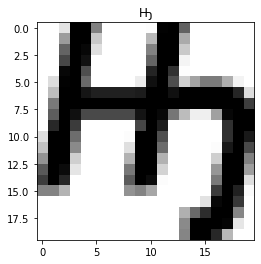

In [380]:
def print_desc(csvLine,Desc):
    for i,d in enumerate(Desc[:12]):
        print('% 11s:'%d,csvLine[i])

a=fL[25000].split(',')
A=np.array(a[12:],dtype='uint8').reshape(20,20)

print('Character:',chr(int(a[2])))
print_desc(a,Desc)

cS=chr(int(a[2]))   
plt.imshow(A,cmap='binary')
plt.title(cS)

In [70]:
b=tf.strings.to_number(a[12:],out_type=tf.int32)
c=tf.reshape(b,(20,20))
print(type(b),b.shape,b.dtype)
print(type(c),c.shape,c.dtype)


<class 'tensorflow.python.framework.ops.EagerTensor'> (400,) <dtype: 'int32'>
<class 'tensorflow.python.framework.ops.EagerTensor'> (20, 20) <dtype: 'int32'>


## Só ir buscar as imagens +outros valores (ex. nº do caracter)

Fun - Eager mode: False
1: (400, None) <class 'tensorflow.python.framework.ops.Tensor'>
2: (20, 20, None) <class 'tensorflow.python.framework.ops.Tensor'>
3: (None, 20, 20) <class 'tensorflow.python.framework.ops.Tensor'>
For - Eager mode: True
tf.Tensor(
[b'NIAGARA' b'BROADWAY' b'IMPRINT' b'BERLIN' b'RAGE' b'SWIS721' b'MAGNETO'
 b'LEELAWADEE' b'COPPERPLATE' b'STENCIL'], shape=(10,), dtype=string)
tf.Tensor([  71 8719  208  212   90  272  233  402   87  204], shape=(10,), dtype=int32) ['G', '∏', 'Ð', 'Ô', 'Z', 'Đ', 'é', 'ƒ', 'W', 'Ì']
(10, 20, 20) <class 'tensorflow.python.framework.ops.EagerTensor'>
For - Eager mode: True
tf.Tensor(
[b'SWIS721' b'BERLIN' b'CALISTO' b'CALISTO' b'TEMPUS' b'BROADWAY'
 b'PAPYRUS' b'TEMPUS' b'COPPERPLATE' b'SWIS721'], shape=(10,), dtype=string)
tf.Tensor([8723   83   92  175  162   74  226  238   65  248], shape=(10,), dtype=int32) ['∓', 'S', '\\', '¯', '¢', 'J', 'â', 'î', 'A', 'ø']
(10, 20, 20) <class 'tensorflow.python.framework.ops.EagerTensor'>


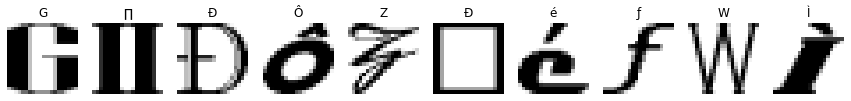

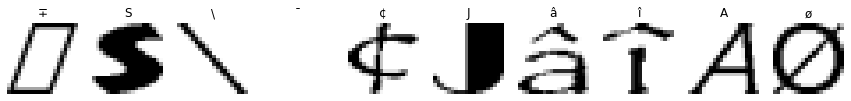

In [398]:
@tf.function
def get_values(r):
    print('Fun - Eager mode:',tf.executing_eagerly())
    y=r['m_label']
    fName=r['font']
    tmp=list(r.values())
    Itmp=tf.convert_to_tensor(tf.stack(tmp[12:]))
    print('1:',Itmp.shape,type(Itmp))
    Itmp=tf.reshape(Itmp,[20,20,-1])    #por "-1" em vez de None - se não não dá
                                        #graph mode quando chama mas eager mode no for quando se faz "take"
    print('2:',Itmp.shape,type(Itmp))
    I=tf.transpose(Itmp,perm=[2,0,1])
    print('3:',I.shape,type(I))
    
    return fName,y,I

batchSize=10
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = dataP+"*.csv",
    num_epochs=1,batch_size=batchSize, 
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

DT=fonts_ds.map(get_values)
for f,y,I in DT.take(2):
    print('For - Eager mode:',tf.executing_eagerly())
    print(f)
    print(y,[chr(i) for i in y])
    print(I.shape,type(I))
    fnumb=0
    plt.figure(figsize=(15,5.5))
    for i in range(batchSize):
        plt.subplot(1,batchSize,fnumb+1)
        plt.imshow(I[i],cmap='binary')
        plt.axis('off')
        plt.axis('scaled')
        plt.title(chr(y[i]))
        fnumb+=1
    

In [393]:
print(get_values)
print(get_values.python_function)


<function get_values at 0x7fa7426c7158>


In [396]:
DT.list_files('*')

<ShuffleDataset shapes: (), types: tf.string>

tf.Tensor(
[[  1 168]
 [  1 168]
 [  1 168]
 [  1 224]
 [  1 255]
 [  1 255]
 [  1 254]
 [  1 180]
 [  1 168]
 [  1 168]], shape=(10, 2), dtype=int32)
(2, 20, 20)


Text(0.5, 1.0, 'Ļ')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 61686 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 61686 missing from current font.
  font.set_text(s, 0, flags=flags)


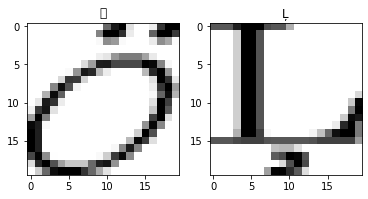

In [174]:
for f in fonts_ds.take(1):
    v=f['m_label']
a=f.values()

b=list(a)
c=tf.stack(b[12:])
print(c[:10])
I=tf.transpose(tf.reshape(c,[20,20,c.shape[1]]),[2,0,1])
print(I.shape)
plt.subplot(121)
plt.imshow(I[0],cmap='binary')
plt.title(chr(v[0]))
plt.subplot(122)
plt.imshow(I[1],cmap='binary')
plt.title(chr(v[1]))

In [162]:
len(a)

412

<class 'collections.OrderedDict'>
font                : [b'PALACE']
fontVariant         : [b'PALACE SCRIPT MT']
m_label             : [730]
strength            : [0.4]
italic              : [0]
orientation         : [0.]
m_top               : [40]
m_left              : [32]
originalH           : [7]
originalW           : [7]
h                   : [20]
w                   : [20]
r0c0                : [1]
Caractere: ˚


Text(0.5, 1.0, '˚')

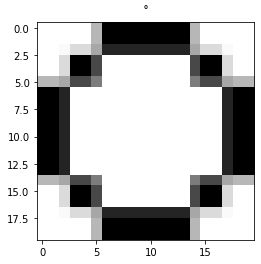

In [130]:
#Tranformar rcs em imagem
for features in fonts_ds.take(1):
    print(type(features))
for i, (name, value) in enumerate(features.items()):
    if i>12:
      break
    print(f"{name:20s}: {value}")
pixL=[]
for r in range(0,20):
    for c in range(0,20):
        dk='r%dc%d'%(r,c)
        #print(dk)
        pixL.append(features[dk])
        
I=np.array(pixL).reshape(20,20)    

plt.imshow(I,cmap='binary')
c_id=int(features['m_label'])
print('Caractere:',chr(c_id))
plt.title(chr(c_id))


In [63]:
features['r0c0']


<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>

Text(0.5, 1.0, 'þ')

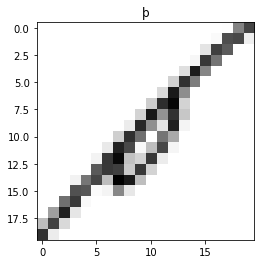

## TF Generators from files names
#### Atenção: é boa política primeiro baralhar a lista com nomes dos ficheiros
### Dataset: Oxford-IIIT-Pet
### Ficheiros que podem dar problemas:
##### Egyptian_Mau_129.jpg, staffordshire_bull_terrier_2.jpg, staffordshire_bull_terrier_22.jpg
##### Abyssinian_34.jpg, Egyptian_Mau_139.jpg, Egyptian_Mau_145.jpg, Egyptian_Mau_167.jpg, Egyptian_Mau_177.jpg, Egyptian_Mau_191.jpg


In [2]:
dicF='/home/gcm/gcm/aulas/AAA/Data/Oxford-IIIT-Pet/Oxford-IIIT-Pet_Dics.p'
imgP='/home/gcm/gcm/aulas/AAA/Data/Oxford-IIIT-Pet/images/'

DicTmp=pickle.load(open(dicF,'rb'))
imgDic=DicTmp['filesDic']
imgK=list(imgDic.keys())
idx=rd.permutation(len(imgK))
imgK=[imgK[i] for i in idx]
print('Número total de imagens:',len(imgK))


Número total de imagens: 7390


In [5]:
imgDic=DicTmp['filesDic']
imgK=list(imgDic.keys())
imgK[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [13]:
imgDic[imgK[3306]]

{'species': 'dog',
 'breed': 'boxer',
 'target': 4,
 'imgDim': (375, 500, 3),
 'foldTrain': False,
 'bndBox': []}

#### Criar gerador

In [14]:
imgGen=tf.data.Dataset.from_tensor_slices(imgK)

for n,f in enumerate(imgGen.take(10)):
    print(n,':',f)

0 : tf.Tensor(b'Abyssinian_1.jpg', shape=(), dtype=string)
1 : tf.Tensor(b'Abyssinian_10.jpg', shape=(), dtype=string)
2 : tf.Tensor(b'Abyssinian_100.jpg', shape=(), dtype=string)
3 : tf.Tensor(b'Abyssinian_101.jpg', shape=(), dtype=string)
4 : tf.Tensor(b'Abyssinian_102.jpg', shape=(), dtype=string)
5 : tf.Tensor(b'Abyssinian_103.jpg', shape=(), dtype=string)
6 : tf.Tensor(b'Abyssinian_104.jpg', shape=(), dtype=string)
7 : tf.Tensor(b'Abyssinian_105.jpg', shape=(), dtype=string)
8 : tf.Tensor(b'Abyssinian_106.jpg', shape=(), dtype=string)
9 : tf.Tensor(b'Abyssinian_107.jpg', shape=(), dtype=string)


In [15]:
print(type(f))
print(f)


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'Abyssinian_107.jpg', shape=(), dtype=string)


In [17]:
b=f.numpy().decode()
print(b)

Abyssinian_107.jpg


In [9]:
imgDic['Abyssinian_1.jpg']

{'species': 'cat',
 'breed': 'Abyssinian',
 'target': 25,
 'imgDim': (400, 600, 3),
 'bndBox': [333, 72, 92, 86],
 'foldTrain': True}

#### Transformações


### 1. Assim dá erro (tensor r ainda não inicializado - não tem a função .numpy())

In [4]:
@tf.function
def readImg(r):
    print(r)
    f=r.numpy().decode()
    #I=cv2.imread(imgP+f)
    #I=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
    I=plt.imread(imgP+f)
    #y=imgDic[f]['target']
    
    return I
ImG=imgGen.map(readImg)

Tensor("r:0", shape=(), dtype=string)


AttributeError: in user code:

    <ipython-input-4-464daa25eabd>:4 readImg  *
        f=r.numpy().decode()
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py:401 __getattr__
        self.__getattribute__(name)

    AttributeError: 'Tensor' object has no attribute 'numpy'


### 2. Assim já funciona 
### Não se pode ainda fazer .batch porque as imagem têm tamanhos diferentes.
### Para tal tem que se converter as imagens em tamanhos iguais.

In [27]:
def readImg(r):
    print(r)
    f=r.numpy().decode()
    #I=cv2.imread(imgP+f)
    #I=cv2.cvtColor(I,cv2.COLOR_BGR2RGB)
    I=plt.imread(imgP+f).astype('float32')
    return I

@tf.function
def imgWrapper(r):
    I=tf.py_function(readImg,[r], [tf.float32])
    return I

imgGen=tf.data.Dataset.from_tensor_slices(imgK)

imgGen=imgGen.shuffle(buffer_size=500)
ImG=imgGen.map(imgWrapper)

tf.Tensor(b'Birman_130.jpg', shape=(), dtype=string)


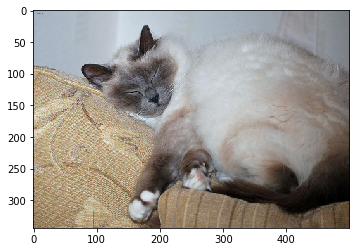

In [30]:
for I in ImG.take(1):
    plt.imshow(I[0].numpy().astype('uint8'))

tuple

### Gerador que converte imagens em tamanhos iguais.
### Incluir também a classe 
### Já se pode fazer batch DEPOIS da conversão

In [3]:
yClasses=np.array([imgDic[f]['target'] for f in imgK],dtype='int16')

In [9]:
y=np.random.randint(0,5,10)
print(y)
Y=keras.utils.to_categorical(y)
print(Y)

[1 1 0 4 1 3 0 1 4 4]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [34]:
def cropImg(I):
    #ver dims.
    #se for só 1 canal -> copiar 3x
    if len(I.shape)==2:
        I=np.stack((I,I,I),axis=2)
    #se tiver 4 canais, tirar último
    if I.shape[2]==4:
        I=I[:,:,:3]
    #fazer crop: maior quadrado central
    h=I.shape[0]
    w=I.shape[1]
    L=np.min((h,w))
    x1=(w-L)//2
    y1=(h-L)//2
    I=I[y1:y1+L,x1:x1+L,:]
    return I

def readImg(r):
    f=r.numpy().decode()
    #print(f)
    I=plt.imread(imgP+f).astype('float32')
    I=cropImg(I)
    I=cv2.resize(I,(300,300),interpolation=cv2.INTER_LINEAR)
    return I

@tf.function
def imgWrapper(r,y):
    I=tf.py_function(readImg,[r], [tf.float32])[0] #neceesário! se não o tensor fica de (bSize,1,300,300,3)
    return I,y

bSize=10
imgGen=tf.data.Dataset.from_tensor_slices((imgK,yClasses))
imgGen=imgGen.shuffle(buffer_size=1000)
ImG=imgGen.map(imgWrapper).batch(bSize)

In [37]:
for I,y in ImG.take(1):
    print(y,I.shape)

tf.Tensor([26 28 27 26 27 26 27 28 25 28], shape=(10,), dtype=int16) (10, 300, 300, 3)


(250, 350, 4)
(250, 250, 3)


'Abyssinian_34.jpg'

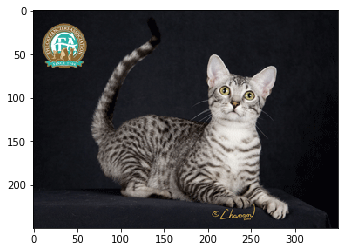

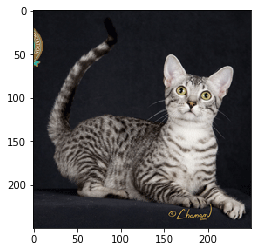

In [32]:
#I=plt.imread(imgP+'Egyptian_Mau_129.jpg')
I=plt.imread(imgP+'Egyptian_Mau_139.jpg')
#I=plt.imread(imgP+'Egyptian_Mau_145.jpg')
print(I.shape)
plt.imshow(I)
B=cropImg(I)
print(B.shape)
plt.figure()
plt.imshow(B)
'Abyssinian_34.jpg'

tf.Tensor([29 28 25 28 26 28 27 25 27 27], shape=(10,), dtype=int16) (10, 300, 300, 3)


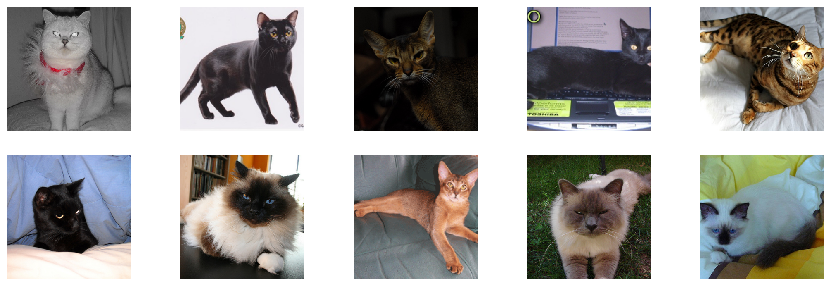

In [41]:
for I,y in ImG.take(1):
    print(y,I.shape)
plt.figure(figsize=(15,5))
for i in range(bSize):
    plt.subplot(2,5,i+1)
    A=I[i].numpy()
    #A.clip(0,255)
    plt.imshow(A.astype('uint8'))
    plt.axis('off')

# Tensorflow Datasets - guardados em formato "TFrecords"

In [30]:
import tensorflow_datasets as tfds

dt,info=tfds.load(name="oxford_iiit_pet",as_supervised=True,with_info=True)
print(info)
class_names=info.features["label"].names #or num_classes

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='/home/gcm/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={


(500, 375, 3) 1
(500, 429, 3) 17
(375, 500, 3) 12
(375, 500, 3) 32
(240, 300, 3) 2


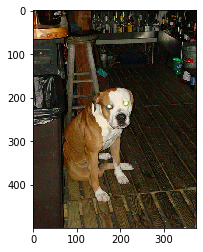

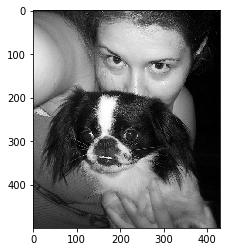

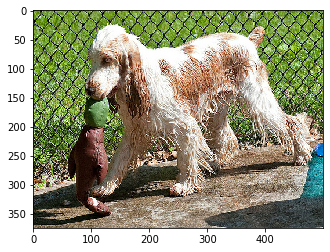

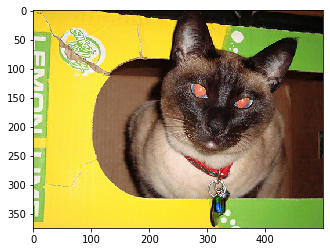

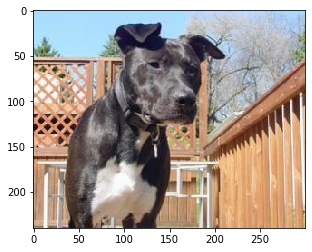

In [36]:
trainG=dt['train']
#trainG.batch(2) -> não dá porque as imagens são de tamanhos diferentes
trainG=trainG.shuffle(buffer_size=100)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure()
    plt.imshow(I)

## Usar só comandos do TF (s,L,x1 e y1 são tensores!!!)
## Assim não é necessário usar o decorador "@tf.function"

In [37]:
def central_crop(image,y):
    s = tf.shape(image)
    L=tf.reduce_min((s[0],s[1]))
    x1=(s[1]-L)//2
    y1=(s[0]-L)//2
    image=tf.image.resize(image[y1:y1+L, x1:x1+L], [300, 300])
    return image,y


(300, 300, 3) 32
(300, 300, 3) 36
(300, 300, 3) 8
(300, 300, 3) 20
(300, 300, 3) 31


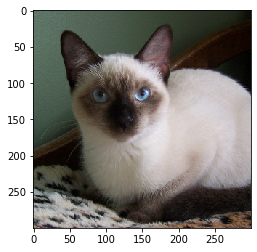

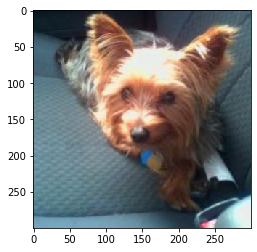

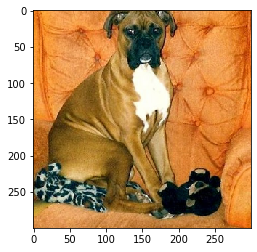

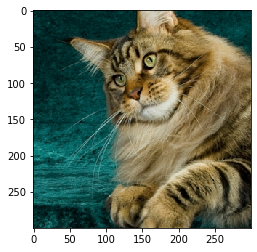

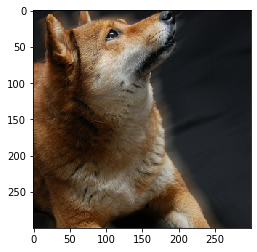

In [38]:
trainG=dt['train']
trainG=trainG.shuffle(buffer_size=100)
trainG=trainG.map(central_crop)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure()
    A=I.numpy()
    plt.imshow(A.astype('uint8'))

### Também se pode usar .batch (DEPOIS de transformar!)

(5, 300, 300, 3) [ 2 12 36 22  3]
(5, 300, 300, 3) [12  8 23  1 14]
(5, 300, 300, 3) [36 23  9  7 32]
(5, 300, 300, 3) [20  0 27 25 34]
(5, 300, 300, 3) [22 18 31 19 22]


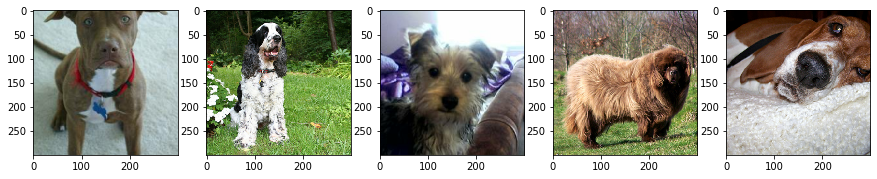

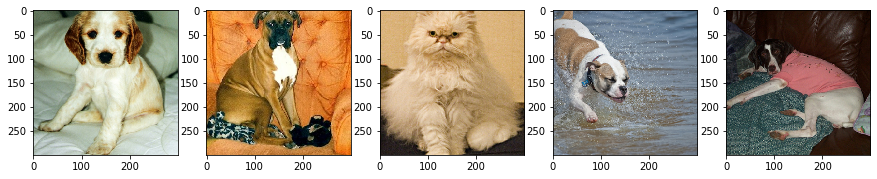

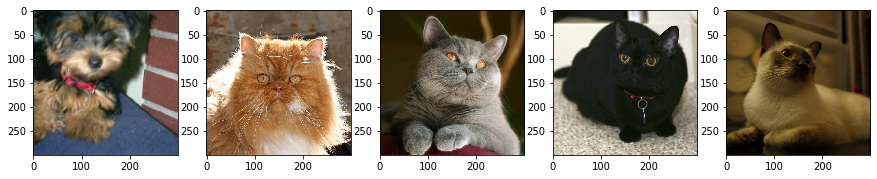

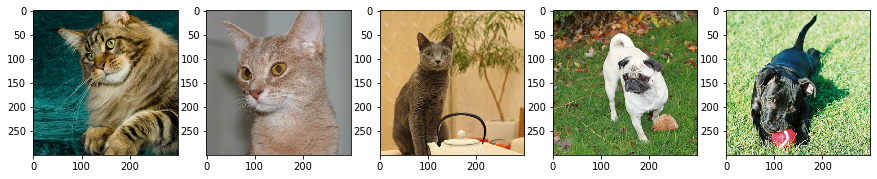

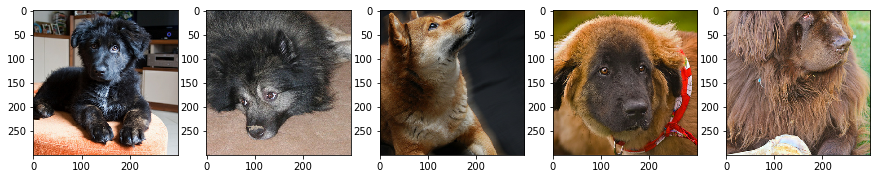

In [39]:
trainG=dt['train']
trainG=trainG.shuffle(buffer_size=100)
trainG=trainG.map(central_crop).batch(5)
for I,y in trainG.take(5):
    print(I.shape,y.numpy())
    plt.figure(figsize=(15,3))
    for i in range(5):
        plt.subplot(1,5,i+1)
        A=I[i].numpy()
        plt.imshow(A.astype('uint8'))

### Carregar e guardar o kMNIST

In [49]:
ds,info=tfdt.load('kmnist',split='train',as_supervised=True,with_info=True)
X1,y1=tfdt.as_numpy(tfdt.load('kmnist',split='train',as_supervised=True,batch_size=-1))
X2,y2=tfdt.as_numpy(tfdt.load('kmnist',split='test',as_supervised=True,batch_size=-1))

In [66]:
idx=np.random.permutation(60000)
X1=X1[idx]
y1=y1[idx]

idx=np.argsort(y2)
X2=X2[idx]
y2=y2[idx]

In [67]:
from sklearn.utils import Bunch as bunch
import pickle
D=bunch(X1=X1,y1=y1,X2=X2,y2=y2,DESCR=str(info))
P='/home/gcm/gcm/aulas/AAA/Data/kMNISTfull.p'
pickle.dump(D,open(P,'wb'))

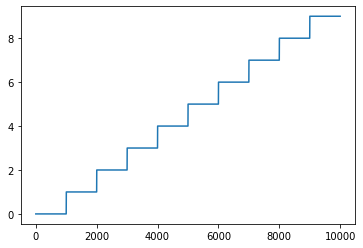

In [68]:
plt.plot(y2)

In [69]:
y1[:100]

array([0, 4, 5, 7, 9, 7, 9, 8, 2, 6, 5, 8, 5, 2, 3, 4, 5, 8, 3, 6, 5, 0,
       2, 4, 4, 0, 5, 8, 5, 6, 9, 8, 2, 2, 2, 3, 3, 3, 6, 5, 3, 3, 9, 6,
       8, 3, 7, 0, 0, 6, 4, 3, 4, 1, 8, 8, 0, 0, 7, 6, 6, 8, 8, 5, 4, 7,
       1, 3, 4, 5, 4, 9, 3, 8, 9, 6, 5, 8, 8, 7, 5, 8, 2, 4, 7, 7, 0, 8,
       7, 1, 7, 1, 0, 4, 0, 4, 3, 1, 0, 5])

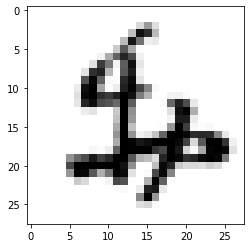

In [71]:
plt.imshow(X1[0],cmap='binary')

In [89]:
X2s=X2[:500,:,:,:]
for i in range(1,10):
    X2s=np.vstack((X2s,X2[i*1000:i*1000+500,:,:,:]))


In [96]:
y2s=np.ones(5000,dtype=int)
for i in range(10):
    y2s[i*500:(i+1)*500]=i

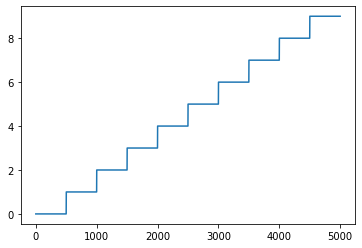

In [97]:
plt.plot(y2s)

In [98]:
from sklearn.model_selection import train_test_split as tts
X1s,Xt,y1s,y=tts(X1,y1,train_size=10000,stratify=y1)

In [101]:
D=bunch(X1=X1s,y1=y1s,X2=X2s,y2=y2s,DESCR=str(info))
P='/home/gcm/gcm/aulas/AAA/Data/kMNISTsmall.p'
pickle.dump(D,open(P,'wb'))

In [100]:
print(str(info))

tfds.core.DatasetInfo(
    name='kmnist',
    full_name='kmnist/3.0.1',
    description="""
    Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.
    """,
    homepage='http://codh.rois.ac.jp/kmnist/index.html.en',
    data_path='/home/gcm/tensorflow_datasets/kmnist/3.0.1',
    download_size=20.26 MiB,
    dataset_size=31.76 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@online{clanuwat2018d

In [88]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9
